Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)
[[-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]
 [-0.]]


(0, 0.05500000000000001)

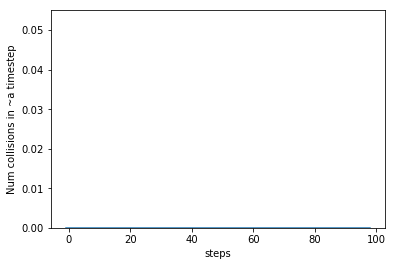

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
#path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/CollisionOverlap/data/'
path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = ''
def overlapSteps(path,res_steps,expt_start,expt_end):
    df_outputs = pd.read_csv(path+"outputReactionsList.txt",sep=" ",header=None) #Add batch processing here potentially
    threshold_steps = -np.zeros((res_steps,1))
    for expt_num, row in enumerate(df_outputs.values):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                ts = float(params.loc[params['param']=='Z_ts_']['val'].values[0])
                res_steps = int(float(params.loc[params['param']=='Z_ts_delta_']['val'].values[0])/ts)
                molpos_start = int(float(params.loc[params['param']=='Z_molPosTSStart_']['val'].values[0]))

                df = pd.read_csv(path+row.squeeze(),delimiter=" ",header=None)
                df.columns=["time","rxn","x","y","z","reactantA","productA","productB","productC"]
                #df=df[df['rxn'].str.contains('rxn4')]

                df=df[['time']].round(4)
                times=np.array(df['time'].tolist())-molpos_start
                for i in range(0,res_steps):
                    a=[t%((ts*res_steps))==0 for t in np.round(times-(ts*(i)),6)]
                    threshold_steps[i] += len(times[a])

            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return(threshold_steps)     
threshold_steps = overlapSteps(path+data,100,1332,1334)
plt.plot(range(-1,100-1),threshold_steps)
print(threshold_steps)
plt.xlabel('steps')
plt.ylabel('Num collisions in ~a timestep')
plt.ylim(0)

4655
[[320.]
 [143.]
 [110.]
 [100.]
 [103.]
 [101.]
 [107.]
 [ 98.]
 [106.]
 [ 98.]
 [ 98.]
 [ 91.]
 [ 91.]
 [ 83.]
 [ 88.]
 [ 79.]
 [ 83.]
 [ 70.]
 [ 77.]
 [ 68.]
 [ 69.]
 [ 63.]
 [ 67.]
 [ 57.]
 [ 60.]
 [ 54.]
 [ 54.]
 [ 49.]
 [ 45.]
 [ 43.]
 [ 45.]
 [ 38.]
 [ 36.]
 [ 37.]
 [ 32.]
 [ 34.]
 [ 34.]
 [ 34.]
 [ 34.]
 [ 38.]
 [ 35.]
 [ 38.]
 [ 35.]
 [ 35.]
 [ 36.]
 [ 33.]
 [ 32.]
 [ 33.]
 [ 30.]
 [ 29.]
 [ 33.]
 [ 29.]
 [ 29.]
 [ 28.]
 [ 28.]
 [ 28.]
 [ 26.]
 [ 28.]
 [ 27.]
 [ 30.]
 [ 28.]
 [ 31.]
 [ 33.]
 [ 28.]
 [ 29.]
 [ 29.]
 [ 29.]
 [ 27.]
 [ 28.]
 [ 26.]
 [ 26.]
 [ 28.]
 [ 27.]
 [ 25.]
 [ 26.]
 [ 25.]
 [ 25.]
 [ 26.]
 [ 21.]
 [ 23.]
 [ 22.]
 [ 23.]
 [ 25.]
 [ 23.]
 [ 25.]
 [ 22.]
 [ 25.]
 [ 24.]
 [ 23.]
 [ 26.]
 [ 22.]
 [ 25.]
 [ 24.]
 [ 22.]
 [ 22.]
 [ 23.]
 [ 18.]
 [ 21.]
 [ 20.]
 [ 21.]]
hi [4655.]


(0, 335.1)

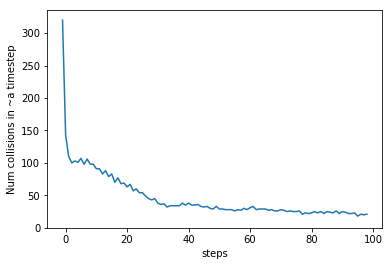

In [482]:
#path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/calculations/CollisionOverlap/data/'
path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
row = 'expt-1333-Reactions-20190831.csv'

my_cols=["time","rxn","x","y","z","reactantA","productA","productB","productC"]
df = pd.read_csv(path+row,delimiter=" ",header=None,names=my_cols)
#df=df[df['rxn'].str.contains('rxn4')]
df=df[['time']].round(6)
times=np.array(df['time'].tolist())
times = np.round(times,6)-10
reaction_count = 0
ts=0.0008
print(len(times))
res_steps=100
threshold_steps = -np.zeros((res_steps,1))
for i in range(0,100):
    #print(np.round(times[1200:1300],4))

    #print(np.round(times[120:130]-ts*(i+1),4))
   # print((ts*res_steps))
    a=[t%((ts*res_steps))==0 for t in np.round(times-(ts*(i)),6)]
   # print(times[a])

    threshold_steps[i] += len(times[a])
plt.plot(range(-1,res_steps-1),threshold_steps)
print(threshold_steps)
print('hi',sum(threshold_steps))
plt.xlabel('steps')
plt.ylabel('Num collisions in ~a timestep')
plt.ylim(0)

In [ ]:
#path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/calculations/CollisionOverlap/data/'
path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
row = 'expt-1333-Reactions-20190831.csv'

my_cols=["time","rxn","x","y","z","reactantA","productA","productB","productC"]
df = pd.read_csv(path+row,delimiter=" ",header=None,names=my_cols)
df=df[df['rxn'].str.contains('rxn4')]
df=df[['time']].round(4)
times=np.array(df['time'].tolist())
times = np.round(times,4)-10
reaction_count = 0
ts=0.0008
res_steps=100
threshold_steps = -np.ones((res_steps,1))
for i in range(7,8):
    print(np.round(times[120:130]-ts*(i+1),4))
    print((ts*res_steps))
    a=[t%((ts*res_steps))==0 for t in np.round(times-(ts*(i+1)),6)]
    print(times[a])

    threshold_steps[i] += len(times[a])
plt.plot(range(-1,res_steps-1),threshold_steps)
print(threshold_steps)
plt.xlabel('steps')
plt.ylabel('Num collisions in ~a timestep')
plt.ylim(0)

In [ ]:
##### path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/calculations/CollisionOverlap/data/'
row = 'expt_0thresh_200res.csv'

my_cols=["time","rxn","x","y","z","reactantA","productA","productB","productC"]
df = pd.read_csv(path+row,delimiter=" ",header=None,names=my_cols)
#df=df[df['rxn'].str.contains('rxn4')]
df=df[['time']].round(4)
#times=np.array(df['time'].tolist())
#times = np.round(times,4)
reaction_count = 0
ts=0.0004
res_steps=300
bts=10
threshold_steps = -np.ones((res_steps,1))
print(times)
for bt in range(bts):
    times_i = df[(df['time']>=(ts*res_steps)*100+bt*res_steps) &(df['time']<(ts*res_steps)*100+(bt+1)*res_steps)]
    times_i = np.array(times_i['time'].tolist())
    for i in range(0,res_steps):
        a=[t%((ts*res_steps)*1e17)==0 for t in times_i*1e17-(ts*(i-1)*1e17)]
        threshold_steps[i] += len(times_i[a])
plt.plot(range(-1,res_steps-1),threshold_steps)
print(threshold_steps)
plt.xlabel('steps')
plt.ylabel('Num collisions in ~a timestep')
plt.ylim(0)

In [56]:
0.48%round(0.0016*300,4)

0.0

[[291.]
 [290.]
 [287.]
 [282.]
 [285.]
 [284.]
 [284.]
 [281.]
 [283.]
 [281.]
 [282.]
 [282.]
 [281.]
 [281.]
 [283.]
 [281.]
 [282.]
 [282.]
 [281.]
 [281.]
 [284.]
 [280.]
 [282.]
 [281.]
 [282.]
 [280.]
 [282.]
 [279.]
 [282.]
 [279.]
 [281.]
 [281.]
 [282.]
 [279.]
 [281.]
 [280.]
 [280.]
 [281.]
 [281.]
 [279.]
 [282.]
 [279.]
 [281.]
 [278.]
 [280.]
 [278.]
 [281.]
 [277.]
 [281.]
 [278.]
 [280.]
 [278.]
 [280.]
 [278.]
 [280.]
 [279.]
 [281.]
 [278.]
 [281.]
 [279.]
 [280.]
 [279.]
 [280.]
 [279.]
 [280.]
 [279.]
 [281.]
 [278.]
 [281.]
 [278.]
 [281.]
 [278.]
 [281.]
 [278.]
 [281.]
 [278.]
 [281.]
 [279.]
 [280.]
 [279.]
 [281.]
 [278.]
 [281.]
 [279.]
 [280.]
 [279.]
 [281.]
 [278.]
 [281.]
 [278.]
 [281.]
 [279.]
 [280.]
 [279.]
 [280.]
 [279.]
 [281.]
 [278.]
 [281.]
 [278.]
 [280.]
 [278.]
 [280.]
 [278.]
 [280.]
 [278.]
 [280.]
 [278.]
 [280.]
 [278.]
 [280.]
 [278.]
 [280.]
 [278.]
 [280.]
 [278.]
 [280.]
 [278.]
 [280.]
 [278.]
 [280.]
 [278.]
 [280.]
 [278.]
 [280.]


(0, 474.4)

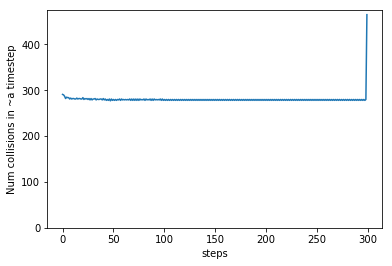

In [3]:
path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = '190831_2354/'
def overlapSteps(path,res_steps,expt_start,expt_end):
    df_outputs = pd.read_csv(path+"outputReactionsList.txt",sep=" ",header=None) #Add batch processing here potentially
    threshold_steps = -np.zeros((res_steps,1))
    for expt_num, row in enumerate(df_outputs.values):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                ts = float(params.loc[params['param']=='Z_ts_']['val'].values[0])
                res_steps = int(float(params.loc[params['param']=='Z_ts_delta_']['val'].values[0])/ts)
                molpos_start = float(params.loc[params['param']=='Z_molPosTSStart_']['val'].values[0])
                df = pd.read_csv(path+row.squeeze(),delimiter=" ",header=None)
                df.columns=["time","rxn","x","y","z","reactantA","productA","productB","productC"]
                #df=df[df['rxn'].str.contains('rxn4')]

                df=df[['time']].round(6)
                times=np.array(df['time'].tolist())-molpos_start
                for i in range(0,res_steps):
                    a=[t%round((ts*res_steps),6)==0 for t in np.round(times-(ts*(i)),6)]
                    
                    #print(list(np.round(times-(ts*(i)),6)))
                    #print(times[a])
                    
                    threshold_steps[i] += len(times[a])

            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return(threshold_steps) 

res_steps=300
threshold_steps = overlapSteps(path+data,res_steps,1650,1652)
plt.plot(range(0,res_steps),threshold_steps)
print(threshold_steps)
plt.xlabel('steps')
plt.ylabel('Num collisions in ~a timestep')
plt.ylim(0)

[[265.]
 [112.]
 [ 91.]]


(0, 273.7)

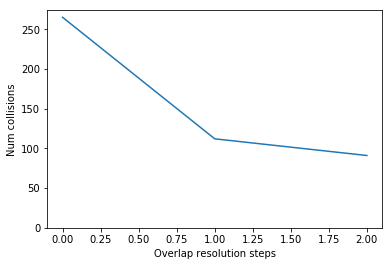

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = '190831_1445/'
def overlapSteps(path,res_steps,expt_start,expt_end):
    df_outputs = pd.read_csv(path+"outputReactionsList.txt",sep=" ",header=None) #Add batch processing here potentially
    threshold_steps = -np.zeros((res_steps,1))
    for expt_num, row in enumerate(df_outputs.values):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                ts = float(params.loc[params['param']=='Z_ts_']['val'].values[0])
                res_steps = int(float(params.loc[params['param']=='Z_ts_delta_']['val'].values[0])/ts)
                molpos_start = float(params.loc[params['param']=='Z_molPosTSStart_']['val'].values[0])
                df = pd.read_csv(path+row.squeeze(),delimiter=" ",header=None)
                df.columns=["time","rxn","x","y","z","reactantA","productA","productB","productC"]
                df=df[df['rxn'].str.contains('rxn5')]

                df=df[['time']].round(6)
                times=np.array(df['time'].tolist())-molpos_start
                for i in range(0,res_steps):
                    a=[t%round((ts*res_steps),6)==0 for t in np.round(times-(ts*(i)),6)]
                    
                    #print(list(np.round(times-(ts*(i)),6)))
                    #print(times[a])
                    
                    threshold_steps[i] += len(times[a])

            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return(threshold_steps) 

res_steps=3
threshold_steps = overlapSteps(path+data,res_steps,500,501)
plt.plot(range(0,res_steps),threshold_steps)
print(threshold_steps)
plt.xlabel('Overlap resolution steps')
plt.ylabel('Num collisions')
plt.ylim(0)


[[342.]
 [243.]
 [237.]]


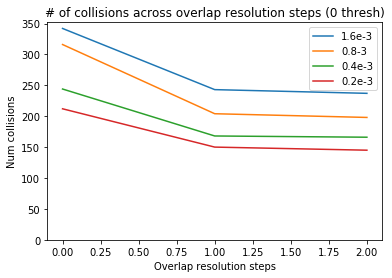

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = '190902_1144/'
def overlapSteps(path,res_steps,expt_start,expt_end):
    df_outputs = pd.read_csv(path+"outputReactionsList.txt",sep=" ",header=None) #Add batch processing here potentially
    threshold_steps = -np.zeros((res_steps,1))
    for expt_num, row in enumerate(df_outputs.values):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                ts = float(params.loc[params['param']=='Z_ts_']['val'].values[0])
                res_steps = int(float(params.loc[params['param']=='Z_ts_delta_']['val'].values[0])/ts)
                molpos_start = float(params.loc[params['param']=='Z_molPosTSStart_']['val'].values[0])
                df = pd.read_csv(path+row.squeeze(),delimiter=" ",header=None)
                df.columns=["time","rxn","x","y","z","reactantA","productA","productB","productC"]
                #df=df[df['rxn'].str.contains('rxn4')]

                df=df[['time']].round(6)
                times=np.array(df['time'].tolist())-molpos_start
                for i in range(0,res_steps):
                    a=[t%round((ts*res_steps),6)==0 for t in np.round(times-(ts*(i)),6)]
                    
                    #print(list(np.round(times-(ts*(i)),6)))
                    #print(times[a])
                    
                    threshold_steps[i] += len(times[a])

            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return(threshold_steps) 

res_steps=3
threshold_steps = overlapSteps(path+data,res_steps,0,1)
plt.plot(range(0,res_steps),threshold_steps,label='1.6e-3')
threshold_steps = overlapSteps(path+data,res_steps,50,51)
plt.plot(range(0,res_steps),threshold_steps,label='0.8-3')
threshold_steps = overlapSteps(path+data,res_steps,100,101)
plt.plot(range(0,res_steps),threshold_steps,label='0.4e-3')
threshold_steps = overlapSteps(path+data,res_steps,150,151)
plt.plot(range(0,res_steps),threshold_steps,label='0.2e-3')
plt.xlabel('Overlap resolution steps')
plt.ylabel('Num collisions')
plt.ylim(0)
plt.title('# of collisions across overlap resolution steps (0 thresh)')
plt.legend()


[[336.]
 [169.]
 [155.]]
[[226.]
 [ 74.]
 [ 69.]]


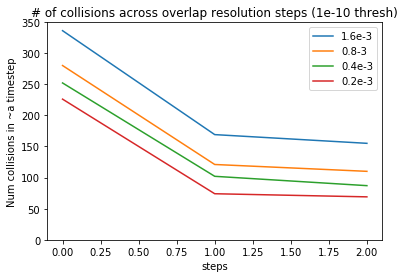

In [66]:
path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = '190902_0223/'
def overlapSteps(path,res_steps,expt_start,expt_end):
    df_outputs = pd.read_csv(path+"outputReactionsList.txt",sep=" ",header=None) #Add batch processing here potentially
    threshold_steps = -np.zeros((res_steps,1))
    for expt_num, row in enumerate(df_outputs.values):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                ts = float(params.loc[params['param']=='Z_ts_']['val'].values[0])
                res_steps = int(float(params.loc[params['param']=='Z_ts_delta_']['val'].values[0])/ts)
                molpos_start = float(params.loc[params['param']=='Z_molPosTSStart_']['val'].values[0])
                df = pd.read_csv(path+row.squeeze(),delimiter=" ",header=None)
                df.columns=["time","rxn","x","y","z","reactantA","productA","productB","productC"]
                #df=df[df['rxn'].str.contains('rxn4')]

                df=df[['time']].round(6)
                times=np.array(df['time'].tolist())-molpos_start
                for i in range(0,res_steps):
                    a=[t%round((ts*res_steps),6)==0 for t in np.round(times-(ts*(i)),6)]
                    
                    #print(list(np.round(times-(ts*(i)),6)))
                    #print(times[a])
                    
                    threshold_steps[i] += len(times[a])

            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return(threshold_steps) 

res_steps=3
threshold_steps = overlapSteps(path+data,res_steps,0,1)
print(threshold_steps)

plt.plot(range(0,res_steps),threshold_steps,label='1.6e-3')
threshold_steps = overlapSteps(path+data,res_steps,200,201)
plt.plot(range(0,res_steps),threshold_steps,label='0.8-3')
threshold_steps = overlapSteps(path+data,res_steps,400,401)
plt.plot(range(0,res_steps),threshold_steps,label='0.4e-3')
threshold_steps = overlapSteps(path+data,res_steps,600,601)
plt.plot(range(0,res_steps),threshold_steps,label='0.2e-3')
print(threshold_steps)
plt.xlabel('steps')
plt.ylabel('Num collisions in ~a timestep')
plt.ylim(0)
plt.title('# of collisions across overlap resolution steps (1e-10 thresh)')
plt.legend()

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def overlapSteps(path,res_steps,expt_start,expt_end):
    df_outputs = pd.read_csv(path+"outputReactionsList.txt",sep=" ",header=None) #Add batch processing here potentially
    threshold_steps = -np.zeros((res_steps,1))
    for expt_num, row in enumerate(df_outputs.values):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                ts = float(params.loc[params['param']=='Z_ts_']['val'].values[0])
                res_steps = int(float(params.loc[params['param']=='Z_ts_delta_']['val'].values[0])/ts)
                molpos_start = float(params.loc[params['param']=='Z_molPosTSStart_']['val'].values[0])
                df = pd.read_csv(path+row.squeeze(),delimiter=" ",header=None)
                df.columns=["time","rxn","x","y","z","reactantA","productA","productB","productC"]
                #df=df[df['rxn'].str.contains('rxn4')]

                df=df[['time']].round(6)
                times=np.array(df['time'].tolist())-molpos_start
                for i in range(0,res_steps):
                    a=[t%round((ts*res_steps),6)==0 for t in np.round(times-(ts*(i)),6)]
                    
                    #print(list(np.round(times-(ts*(i)),6)))
                    #print(times[a])
                    
                    threshold_steps[i] += len(times[a])

            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return(threshold_steps) 
path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = '190902_1144/data/data/'
res_steps=3
threshold_steps = overlapSteps(path+data,res_steps,0,1)
print(threshold_steps)

path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = '190902_0223/data/data/'
res_steps=3
threshold_steps = overlapSteps(path+data,res_steps,0,1)
print(threshold_steps)

[[342.]
 [243.]
 [237.]]
[[336.]
 [169.]
 [155.]]


[[258.]
 [175.]
 [172.]]


[[335.]
 [245.]
 [224.]]
[[245.]
 [179.]
 [151.]]


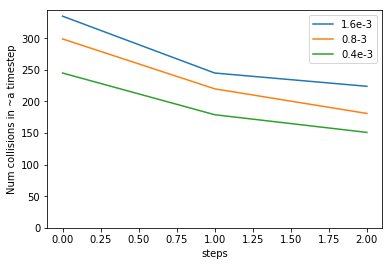

In [72]:
path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = '190903_0147/'
def overlapSteps(path,res_steps,expt_start,expt_end):
    df_outputs = pd.read_csv(path+"outputReactionsList.txt",sep=" ",header=None) #Add batch processing here potentially
    threshold_steps = -np.zeros((res_steps,1))
    for expt_num, row in enumerate(df_outputs.values):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                ts = float(params.loc[params['param']=='Z_ts_']['val'].values[0])
                res_steps = int(float(params.loc[params['param']=='Z_ts_delta_']['val'].values[0])/ts)
                molpos_start = float(params.loc[params['param']=='Z_molPosTSStart_']['val'].values[0])
                df = pd.read_csv(path+row.squeeze(),delimiter=" ",header=None)
                df.columns=["time","rxn","x","y","z","reactantA","productA","productB","productC"]
                #df=df[df['rxn'].str.contains('rxn4')]

                df=df[['time']].round(6)
                times=np.array(df['time'].tolist())-molpos_start
                for i in range(0,res_steps):
                    a=[t%round((ts*res_steps),6)==0 for t in np.round(times-(ts*(i)),6)]
                    
                    #print(list(np.round(times-(ts*(i)),6)))
                    #print(times[a])
                    
                    threshold_steps[i] += len(times[a])

            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return(threshold_steps) 

res_steps=3
threshold_steps = overlapSteps(path+data,res_steps,0,1)
print(threshold_steps)
plt.plot(range(0,res_steps),threshold_steps,label='1.6e-3')
threshold_steps = overlapSteps(path+data,res_steps,50,51)
plt.plot(range(0,res_steps),threshold_steps,label='0.8-3')
threshold_steps = overlapSteps(path+data,res_steps,100,101)
plt.plot(range(0,res_steps),threshold_steps,label='0.4e-3')
#threshold_steps = overlapSteps(path+data,res_steps,150,200)
#plt.plot(range(0,res_steps),threshold_steps,label='0.2e-3')
print(threshold_steps)
plt.xlabel('steps')
plt.ylabel('Num collisions in ~a timestep')
plt.ylim(0)
plt.legend()

80.0
[[350.]
 [265.]]
20.0
5.0
1.25
0.3125
[[112.]
 [177.]]


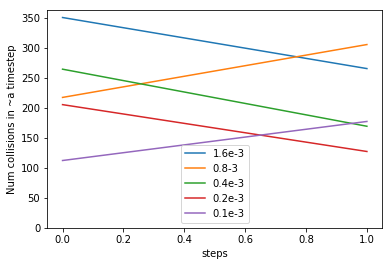

In [104]:
path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = '190903_0350/'
def overlapSteps(path,res_steps,expt_start,expt_end):
    df_outputs = pd.read_csv(path+"outputReactionsList.txt",sep=" ",header=None) #Add batch processing here potentially
    threshold_steps = -np.zeros((res_steps,1))
    for expt_num, row in enumerate(df_outputs.values):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                ts = float(params.loc[params['param']=='Z_ts_']['val'].values[0])
                res_steps = int(float(params.loc[params['param']=='Z_ts_delta_']['val'].values[0])/ts)
                molpos_start = float(params.loc[params['param']=='Z_molPosTSStart_']['val'].values[0])
                print(molpos_start)
                df = pd.read_csv(path+row.squeeze(),delimiter=" ",header=None)
                df.columns=["time","rxn","x","y","z","reactantA","productA","productB","productC"]
                #df=df[df['rxn'].str.contains('rxn4')]

                df=df[['time']].round(6)
                times=np.array(df['time'].tolist())-molpos_start
                for i in range(0,res_steps):
                    a=[t%round((ts*res_steps),6)==0 for t in np.round(times-(ts*(i)),6)]
                    
                    #print(list(np.round(times-(ts*(i)),6)))
                    #print(times[a])
                    
                    threshold_steps[i] += len(times[a])

            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return(threshold_steps) 
n=1
delta=50
k=250
res_steps=2
threshold_steps = overlapSteps(path+data,res_steps,k,k+n)
plt.plot(range(0,res_steps),threshold_steps,label='1.6e-3')
print(threshold_steps)

threshold_steps = overlapSteps(path+data,res_steps,k+delta,k+delta+n)
plt.plot(range(0,res_steps),threshold_steps,label='0.8-3')
threshold_steps = overlapSteps(path+data,res_steps,k+2*delta,k+2*delta+n)
plt.plot(range(0,res_steps),threshold_steps,label='0.4e-3')
threshold_steps = overlapSteps(path+data,res_steps,k+3*delta,k+3*delta+n)
plt.plot(range(0,res_steps),threshold_steps,label='0.2e-3')
threshold_steps = overlapSteps(path+data,res_steps,k+4*delta,k+4*delta+n)
plt.plot(range(0,res_steps),threshold_steps,label='0.1e-3')
print(threshold_steps)
plt.xlabel('steps')
plt.ylabel('Num collisions in ~a timestep')
plt.ylim(0)
plt.legend()

240.00000000000003
[[352.]
 [248.]
 [226.]]
240.00000000000003
240.00000000000003
240.00000000000003
240.00000000000003
[[107.]
 [ 98.]
 [179.]]


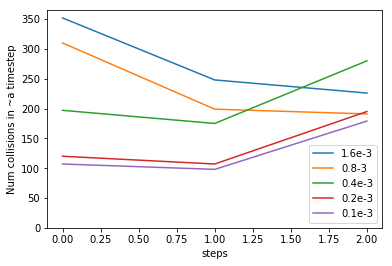

In [109]:
path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = '190903_1848/'
def overlapSteps(path,res_steps,expt_start,expt_end):
    df_outputs = pd.read_csv(path+"outputReactionsList.txt",sep=" ",header=None) #Add batch processing here potentially
    threshold_steps = -np.zeros((res_steps,1))
    for expt_num, row in enumerate(df_outputs.values):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                ts = float(params.loc[params['param']=='Z_ts_']['val'].values[0])
                res_steps = int(float(params.loc[params['param']=='Z_ts_delta_']['val'].values[0])/ts)
                molpos_start = float(params.loc[params['param']=='Z_molPosTSStart_']['val'].values[0])
                print(molpos_start)
                df = pd.read_csv(path+row.squeeze(),delimiter=" ",header=None)
                df.columns=["time","rxn","x","y","z","reactantA","productA","productB","productC"]
                #df=df[df['rxn'].str.contains('rxn4')]

                df=df[['time']].round(6)
                times=np.array(df['time'].tolist())-molpos_start
                for i in range(0,res_steps):
                    a=[t%round((ts*res_steps),6)==0 for t in np.round(times-(ts*(i)),6)]
                    
                    #print(list(np.round(times-(ts*(i)),6)))
                    #print(times[a])
                    
                    threshold_steps[i] += len(times[a])

            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return(threshold_steps) 
n=1
delta=50
k=500
res_steps=3
threshold_steps = overlapSteps(path+data,res_steps,k,k+n)
plt.plot(range(0,res_steps),threshold_steps,label='1.6e-3')
print(threshold_steps)

threshold_steps = overlapSteps(path+data,res_steps,k+delta,k+delta+n)
plt.plot(range(0,res_steps),threshold_steps,label='0.8-3')
threshold_steps = overlapSteps(path+data,res_steps,k+2*delta,k+2*delta+n)
plt.plot(range(0,res_steps),threshold_steps,label='0.4e-3')
threshold_steps = overlapSteps(path+data,res_steps,k+3*delta,k+3*delta+n)
plt.plot(range(0,res_steps),threshold_steps,label='0.2e-3')
threshold_steps = overlapSteps(path+data,res_steps,k+4*delta,k+4*delta+n)
plt.plot(range(0,res_steps),threshold_steps,label='0.1e-3')
print(threshold_steps)
plt.xlabel('steps')
plt.ylabel('Num collisions in ~a timestep')
plt.ylim(0)
plt.legend()

[[2718.]
 [2157.]
 [1892.]]
[[2229.]
 [1672.]
 [1405.]]


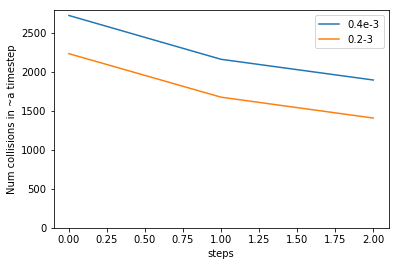

In [25]:
path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = '190905_0050/'
def overlapSteps(path,res_steps,expt_start,expt_end):
    df_outputs = pd.read_csv(path+"outputReactionsList.txt",sep=" ",header=None) #Add batch processing here potentially
    threshold_steps = -np.zeros((res_steps,1))
    for expt_num, row in enumerate(df_outputs.values):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                ts = float(params.loc[params['param']=='Z_ts_']['val'].values[0])
                res_steps = int(float(params.loc[params['param']=='Z_ts_delta_']['val'].values[0])/ts)
                molpos_start = float(params.loc[params['param']=='Z_molPosTSStart_']['val'].values[0])
                df = pd.read_csv(path+row.squeeze(),delimiter=" ",header=None)
                df.columns=["time","rxn","x","y","z","reactantA","productA","productB","productC"]
                df=df[df['rxn'].str.contains('rxn4')]

                df=df[['time']].round(6)
                times=np.array(df['time'].tolist())-molpos_start
                for i in range(0,res_steps):
                    a=[t%round((ts*res_steps),6)==0 for t in np.round(times-(ts*(i)),6)]
                    
                    #print(list(np.round(times-(ts*(i)),6)))
                    #print(times[a])
                    
                    threshold_steps[i] += len(times[a])

            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return(threshold_steps) 
n=50
delta=50
k=1350
res_steps=3

threshold_steps = overlapSteps(path+data,res_steps,k,k+n)
plt.plot(range(0,res_steps),threshold_steps,label='0.4e-3')
print(threshold_steps)

threshold_steps = overlapSteps(path+data,res_steps,k+delta,k+delta+n)
plt.plot(range(0,res_steps),threshold_steps,label='0.2-3')
print(threshold_steps)

#threshold_steps = overlapSteps(path+data,res_steps,k+2*delta,k+2*delta+n)
#plt.plot(range(0,res_steps),threshold_steps,label='0.1e-3')
#print(threshold_steps)

plt.xlabel('steps')
plt.ylabel('Num collisions in ~a timestep')
plt.ylim(0)
plt.legend()
#[[11726.][ 6425.]]
#[[13273.][ 7762.]]
#[[12224.][ 6757.]]
#[[13262.][ 7852.]]

[[96.75]
 [59.8 ]
 [50.35]]


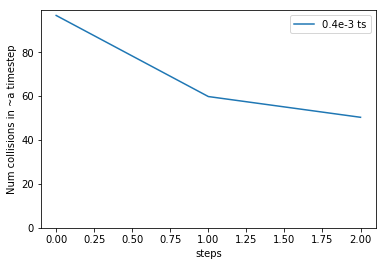

In [36]:
path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = '190906_1302/'
def overlapSteps(path,res_steps,expt_start,expt_end):
    df_outputs = pd.read_csv(path+"outputReactionsList.txt",sep=" ",header=None) #Add batch processing here potentially
    threshold_steps = -np.zeros((res_steps,1))
    for expt_num, row in enumerate(df_outputs.values):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                ts = float(params.loc[params['param']=='Z_ts_']['val'].values[0])
                res_steps = int(float(params.loc[params['param']=='Z_ts_delta_']['val'].values[0])/ts)
                molpos_start = float(params.loc[params['param']=='Z_molPosTSStart_']['val'].values[0])
                df = pd.read_csv(path+row.squeeze(),delimiter=" ",header=None)
                df.columns=["time","rxn","x","y","z","reactantA","productA","productB","productC"]
                #df=df[df['rxn'].str.contains('rxn4')]

                df=df[['time']].round(6)
                times=np.array(df['time'].tolist())-molpos_start
                for i in range(0,res_steps):
                    a=[t%round((ts*res_steps),6)==0 for t in np.round(times-(ts*(i)),6)]
                    
                    #print(list(np.round(times-(ts*(i)),6)))
                    #print(times[a])
                    
                    threshold_steps[i] += len(times[a])

            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return(threshold_steps) 
n=10
delta=50
k=650
res_steps=3

threshold_steps = overlapSteps(path+data,res_steps,k,k+n)
plt.plot(range(0,res_steps),threshold_steps/(n*2),label='0.4e-3 ts')
print(threshold_steps/(n*2))
#threshold_steps = overlapSteps(path+data,res_steps,k+1,k+n+1)
#plt.plot(range(0,res_steps),threshold_steps/(n*2),label='0.2e-2 ts')
#print(threshold_steps/(n*2))
#threshold_steps = overlapSteps(path+data,res_steps,k+2,k+n+2)
#plt.plot(range(0,res_steps),threshold_steps/(n*2),label='0.1e-3 ts')
#print(threshold_steps/(n*2))
#plt.plot(range(0,res_steps),threshold_steps/(n*2),label='0.05e-3 ts')
#print(threshold_steps/(n*2))


#threshold_steps = overlapSteps(path+data,res_steps,k+2*delta,k+2*delta+n)
#plt.plot(range(0,res_steps),threshold_steps,label='0.1e-3')
#print(threshold_steps)

plt.xlabel('steps')
plt.ylabel('Num collisions in ~a timestep')
plt.ylim(0)
plt.legend()
#[[11726.][ 6425.]]
#[[13273.][ 7762.]]
#[[12224.][ 6757.]]
#[[13262.][ 7852.]]